# Clamped beam using adapted load

In [2]:
import sympy as sym
sym.init_printing()

In [40]:
E, a = sym.symbols('E, a')

EI_yy = EI_zz = E * (a * 2) * (a * 2) **3 / 36
EI_yz = E * (a * 2 * (a * 2) **3 ) / (36 * 2 * a / a)

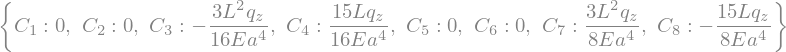

In [41]:
x, q_z, L= sym.symbols('x,  q_z, L')
u_y, u_z = sym.Function('u_y'), sym.Function('u_z')
ode_y = sym.Eq( EI_yy * sym.diff(u_y(x), x, 4), ( - EI_yz * EI_yy * q_z) / (EI_yy * EI_zz - (EI_yz ) **2))
ode_z = sym.Eq( EI_zz * sym.diff(u_z(x), x, 4), ( + EI_yy * EI_zz * q_z) / (EI_yy * EI_zz - (EI_yz ) **2))

C1, C2, C3, C4, C5, C6, C7, C8 = sym.symbols('C1, C2, C3, C4, C5, C6, C7, C8')
sol = sym.dsolve([ode_y,ode_z], [u_y(x),u_z(x)])
u_y = sol[0].rhs
u_z = sol[1].rhs

phi_y = -sym.diff(u_z,x)
phi_z = sym.diff(u_y,x)
kappa_y = -sym.diff(phi_z,x)
kappa_z = sym.diff(phi_y,x)
M_y = EI_yy * kappa_y + EI_yz * kappa_z
M_z = EI_zz * kappa_z + EI_yz * kappa_y

eq1 = sym.Eq(u_y.subs(x,0),0)
eq2 = sym.Eq(u_z.subs(x,0),0)
eq3 = sym.Eq(phi_y.subs(x,0),0)
eq4 = sym.Eq(phi_z.subs(x,0),0)
eq5 = sym.Eq(u_y.subs(x,L),0)
eq6 = sym.Eq(u_z.subs(x,L),0)
eq7 = sym.Eq(M_y.subs(x,L),0)
eq8 = sym.Eq(M_z.subs(x,L),0)

sol = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8], [C1, C2, C3, C4, C5, C6, C7, C8])
display(sol)

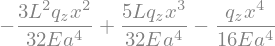

In [42]:
display(u_y.subs(sol))

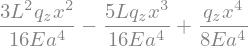

In [43]:
display(u_z.subs(sol))

In [45]:
display(sym.simplify(M_y.subs(sol)))

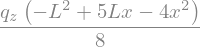

In [47]:
display(sym.simplify(M_z.subs(sol)))

In [48]:
u_y_func = sym.lambdify([x, q_z, L, E, a], u_y.subs(sol))
u_z_func = sym.lambdify([x, q_z, L, E, a], u_z.subs(sol))
M_y_func = sym.lambdify([x, q_z, L, E, a], M_y.subs(sol))
M_z_func = sym.lambdify([x, q_z, L, E, a], M_z.subs(sol))

In [49]:
import numpy as np
import matplotlib.pyplot as plt

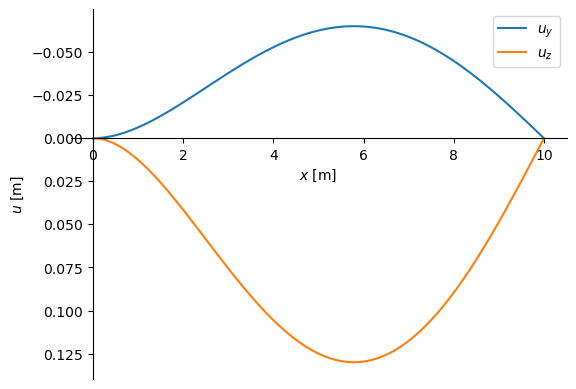

In [50]:
x_plot = np.linspace(0,10,100)
plt.plot(x_plot,u_y_func(x_plot,8,10,100e6,0.1),label='$u_y$')
plt.plot(x_plot,u_z_func(x_plot,8,10,100e6,0.1),label='$u_z$')
plt.legend(loc='best')
plt.ylabel('$u$ [m]')
plt.xlabel('$x$ [m]')
plt.gca().invert_yaxis()
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

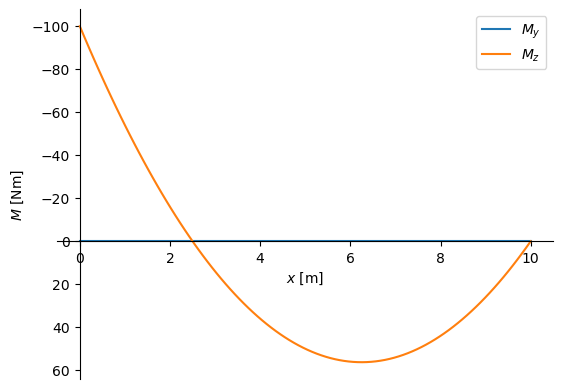

In [51]:
plt.figure()
plt.plot(x_plot,M_y_func(x_plot,8,10,100e6,0.1),label='$M_y$')
plt.plot(x_plot,M_z_func(x_plot,8,10,100e6,0.1),label='$M_z$')
plt.legend(loc='best')
plt.ylabel('$M$ [Nm]')
plt.xlabel('$x$ [m]')
plt.gca().invert_yaxis()
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
